# Import libraries and dataset

In [22]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [23]:
df = pd.read_csv('insurance.csv')

In [24]:
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [25]:
df.isnull().sum()
# No missing values in the dataset

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

In [26]:
# Features
X = df.drop(['charges'], axis=1)
# Labels
y = df['charges']

# Data preprocessing

## Split the dataset into train & test (For prediction purpose only)

In [27]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

## Create a pipeline

In [28]:
# Encoding categorical labels & apply scaling
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.compose import ColumnTransformer

# Model
from sklearn.linear_model import LinearRegression

# Instead of just using same test data we change the test data and train the model again to get the score
from sklearn.model_selection import cross_val_score
# For cross validation since test data is changing
from sklearn.pipeline import Pipeline

In [29]:
# Categorical columns
columns_to_encode = ['sex', 'smoker','region']
# Numeric columns
numeric_cols = ['age','bmi','children']

preprocessor = ColumnTransformer(
    transformers=[
        ('scaler', StandardScaler(), numeric_cols),
        ('encoder', OneHotEncoder(sparse_output=False), columns_to_encode)
    ],
    remainder='passthrough'
)

pipeline = Pipeline(
    steps=[
        ('preprocessor', preprocessor),
        ('regressor', LinearRegression())
    ]
)

# Evaluate model

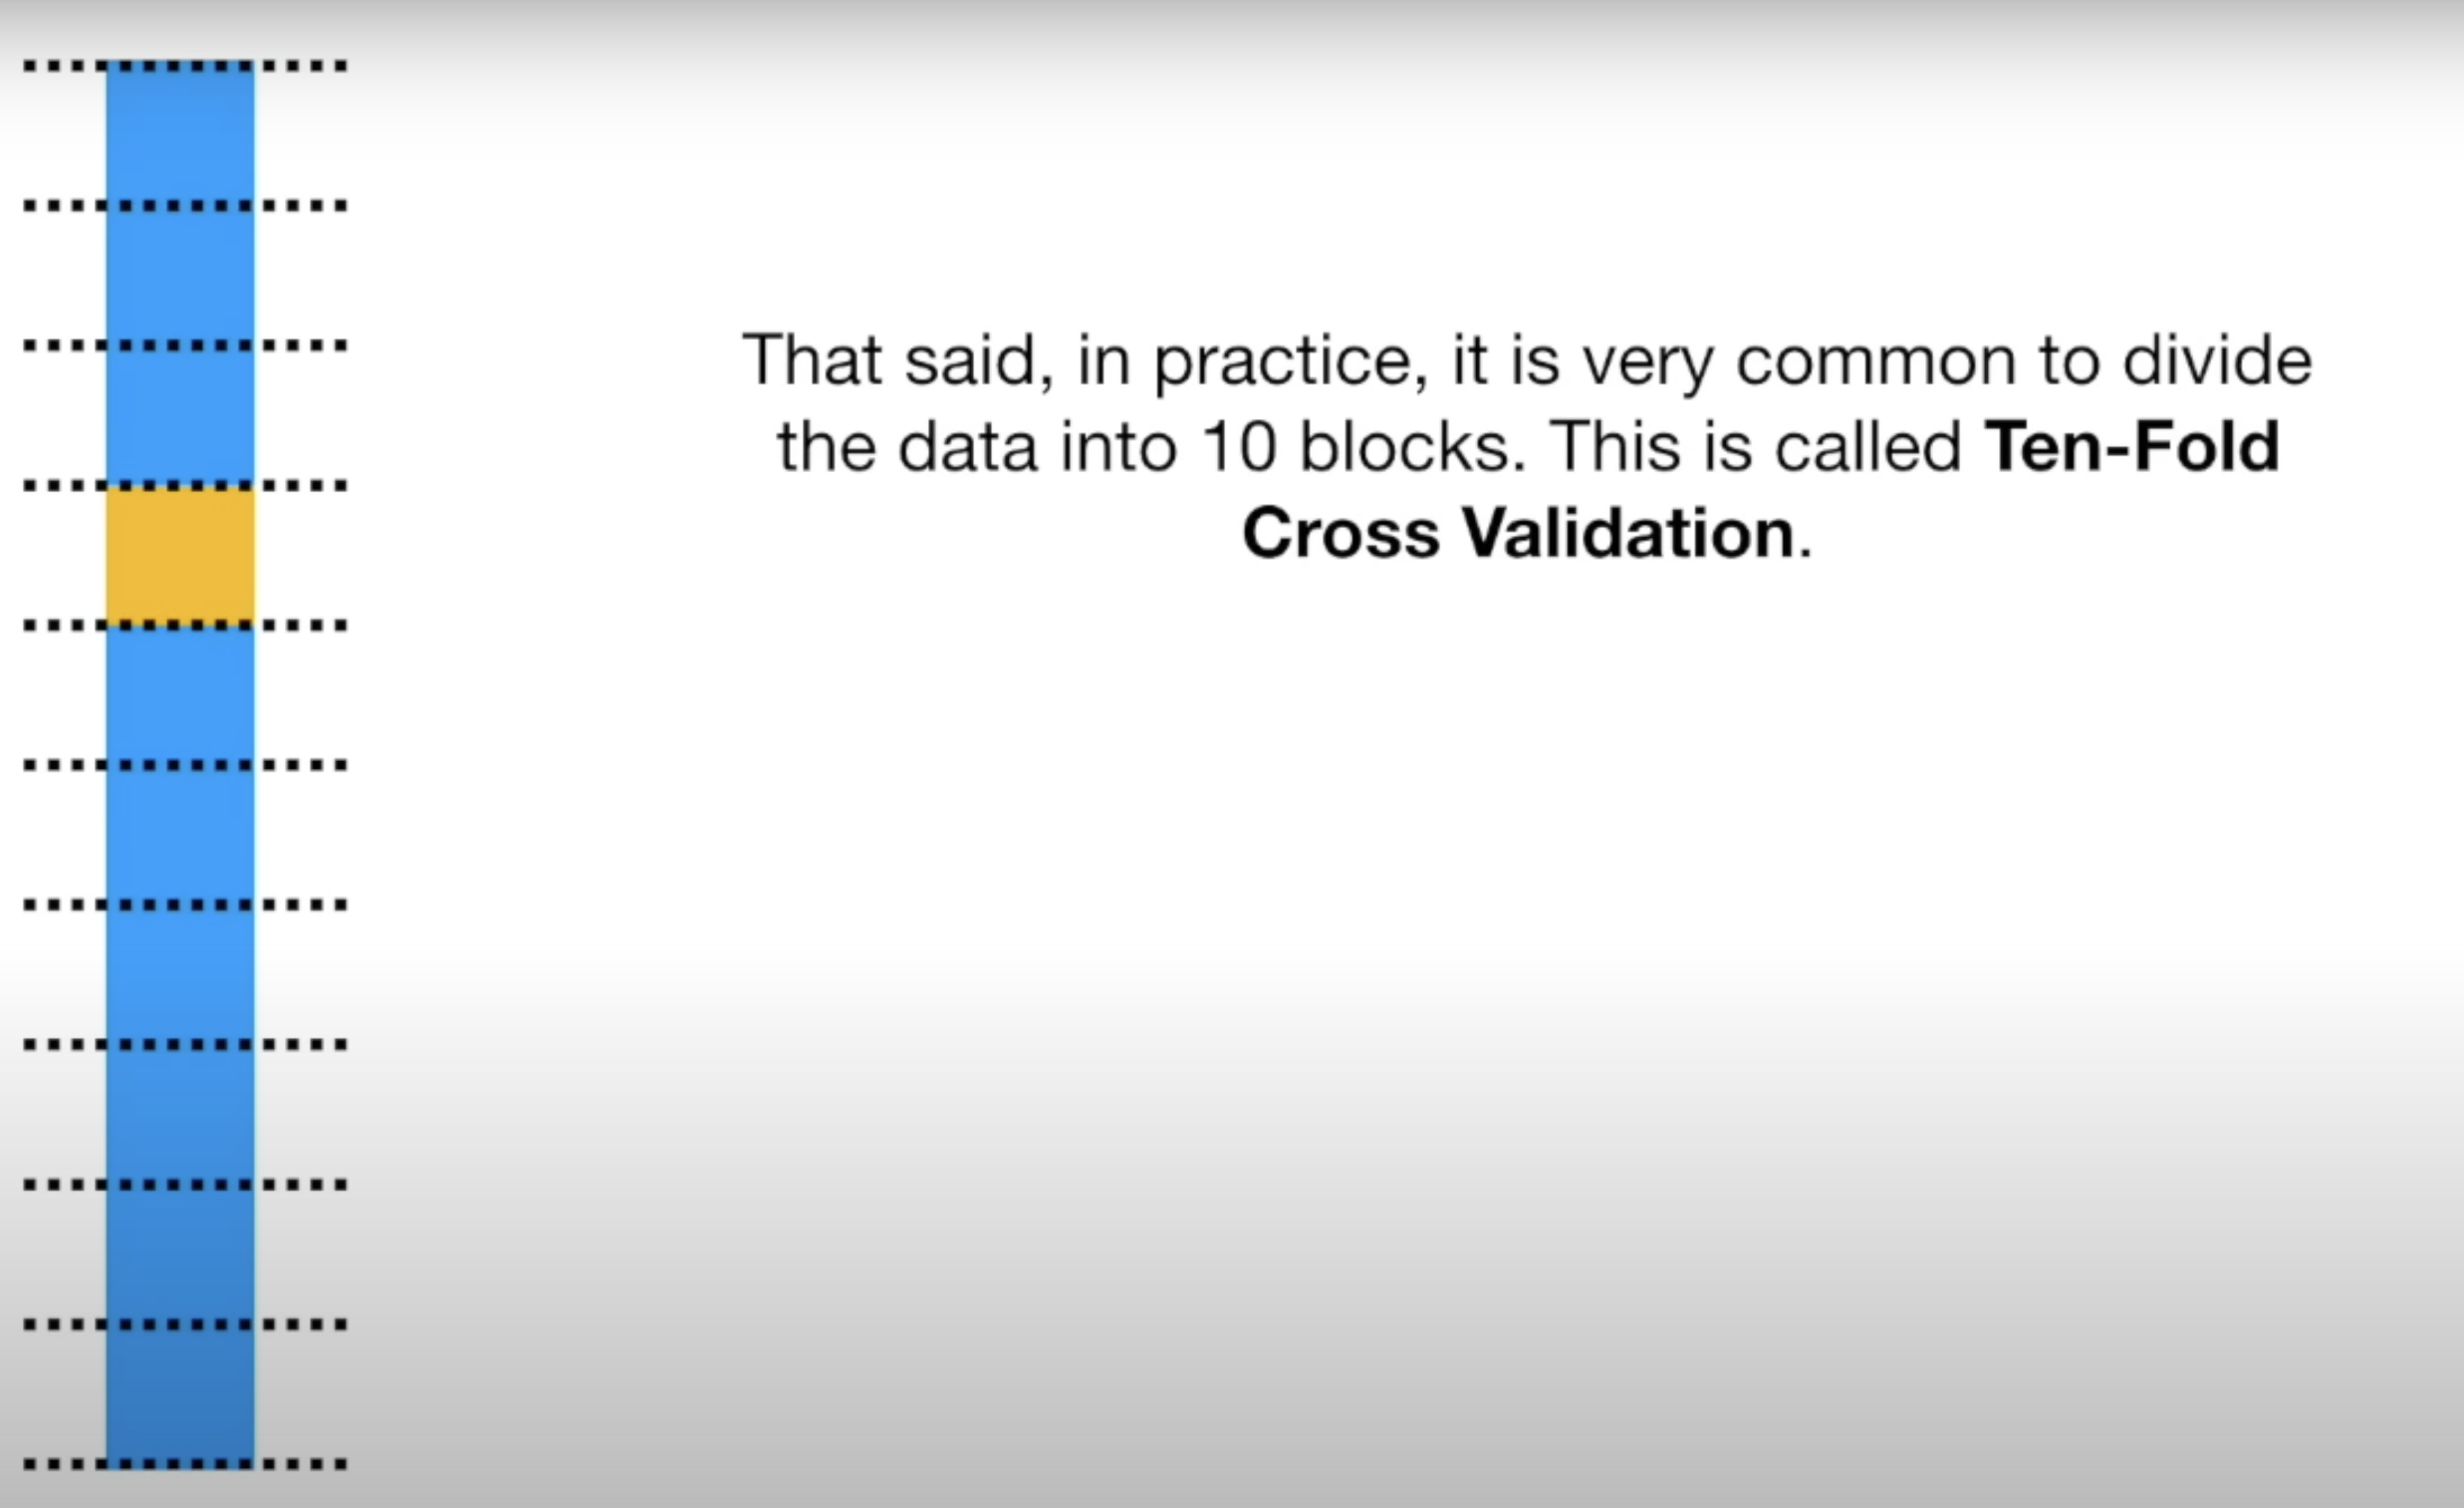

In [30]:
# Goes through columntransformer then trains for each test block & returns r2_score for each fold
scores = cross_val_score(pipeline, X, y, cv=5)
print("CV R² scores:", scores)
print("Mean R² score:", scores.mean())

CV R² scores: [0.76149082 0.70158063 0.77895859 0.73183671 0.75116571]
Mean R² score: 0.7450064910154408


# Plot

In [31]:
# Fit the pipeline on training data
pipeline.fit(X_train, y_train)

# Predictions for plots
y_train_pred = pipeline.predict(X_train)
y_test_pred = pipeline.predict(X_test)

In [32]:
import seaborn as sns
import matplotlib.pyplot as plt

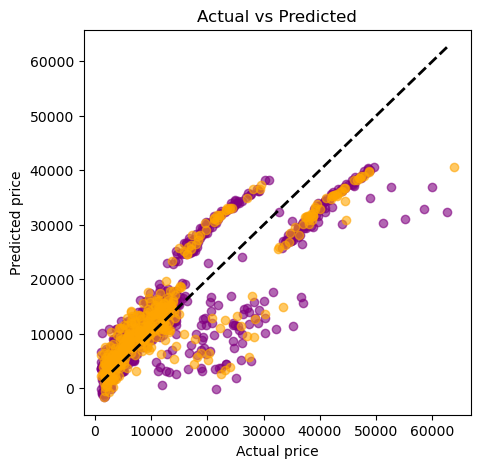

In [43]:
# Predicted vs Actual
plt.figure(figsize=(5,5))
plt.scatter(y_train, y_train_pred, alpha=0.6, color='purple')
plt.scatter(y_test, y_test_pred, alpha=0.6, color='orange')
plt.xlabel('Actual price')
plt.ylabel('Predicted price')
plt.plot([y_train.min(), y_train.max()], [y_train.min(), y_train.max()], 'k--', lw=2)
plt.title('Actual vs Predicted')
plt.show()

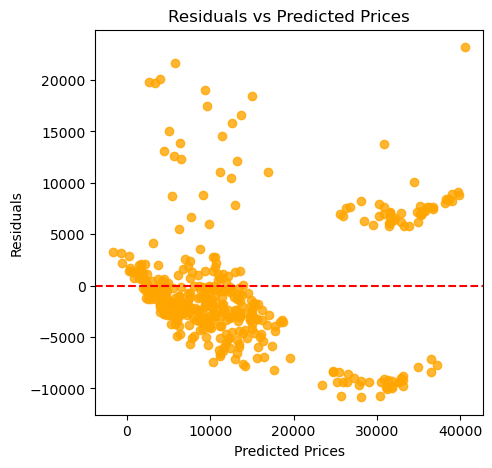

In [41]:
residuals = y_test - y_test_pred
plt.figure(figsize=(5,5))
plt.scatter(x=y_test_pred, y=residuals, alpha= 0.8, color='orange')
plt.axhline(0, color='red', linestyle='--')
plt.xlabel('Predicted Prices')
plt.ylabel('Residuals')
plt.title('Residuals vs Predicted Prices')
plt.show()

**Non-random pattern**
- Residuals are not randomly scattered.
  We see curved, fan-like shapes → this means linear model assumptions are violated

**Heteroscedasticity**
- The spread of residuals increases as predicted prices increase.
  This is a classic sign of heteroscedasticity (non-constant variance), which violates a key assumption of linear regression.
  It means the model is less reliable for higher charges.

A better model (like polynomial regression, decision tree, or random forest) might do a better job.


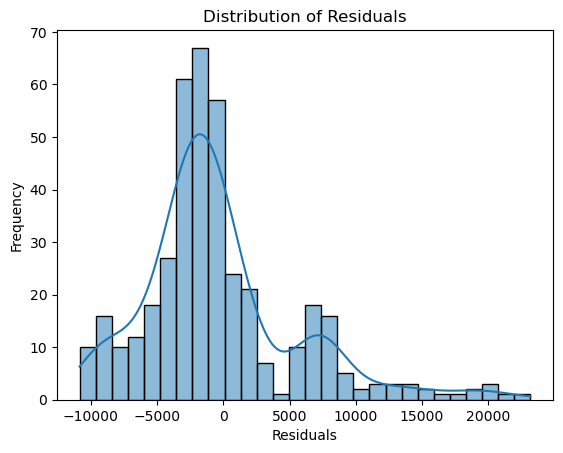

In [38]:
sns.histplot(residuals, kde=True)
plt.title('Distribution of Residuals')
plt.xlabel('Residuals')
plt.ylabel('Frequency')
plt.show()

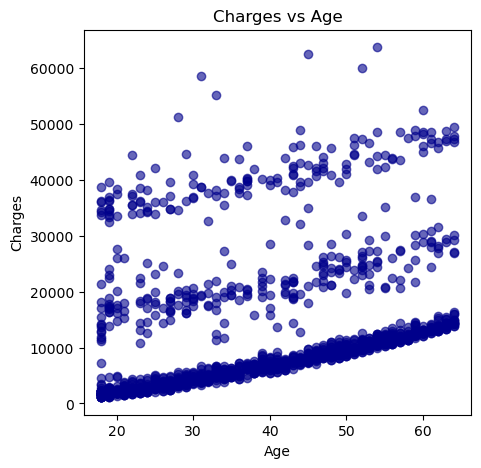

In [39]:
plt.figure(figsize=(5,5))
plt.scatter(df['age'], df['charges'], alpha=0.6, color='darkblue')
plt.xlabel('Age')
plt.ylabel('Charges')
plt.title('Charges vs Age')
plt.show()

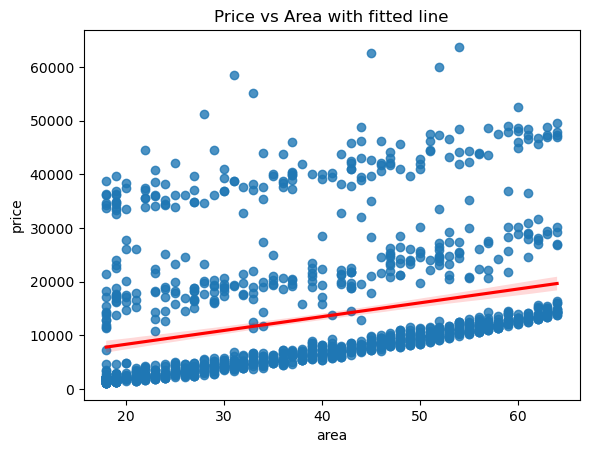

In [40]:
sns.regplot(x='age', y='charges', data=df, line_kws={"color":"red"})
plt.title('Price vs Area with fitted line')
plt.xlabel('area')
plt.ylabel('price')
plt.show()